In [1]:
from subjects import DIPSubject

# curr_trial = "freestyle1"
curr_trial = "3"
# curr_trial = "01"

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from subjects.constants import NIMBLE_BODY_NODES_UIP, NIMBLE_BODY_NODES_DIP, NIMBLE_BODY_NODES_TOTAL_CAPTURE
from subjects.uip_subject import UIPSubject
from subjects.dip_imu_subject import DIPSubject
from subjects.total_capture_subject import TotalCaptureSubject

import nimblephysics as nimble

GEOMETRY_PATH = "/home/meribejayson/Desktop/Projects/realistic-imu/data/final_dataset/Geometry/"
trial_path_uip = "/home/meribejayson/Desktop/Projects/realistic-imu/data/final_dataset/UIP/S0.b3d"
trial_path_dip = "/home/meribejayson/Desktop/Projects/realistic-imu/data/final_dataset/DIP/S1.b3d"
trial_path_tot_cap = "/home/meribejayson/Desktop/Projects/realistic-imu/data/final_dataset/Total-Capture/S4.b3d"

In [3]:
# subject = TotalCaptureSubject(trial_path_tot_cap, GEOMETRY_PATH, NIMBLE_BODY_NODES_TOTAL_CAPTURE)
# subject = DIPSubject(trial_path_dip, GEOMETRY_PATH, NIMBLE_BODY_NODES_DIP)
subject = UIPSubject(trial_path_uip, GEOMETRY_PATH, NIMBLE_BODY_NODES_UIP)

Setting len to 0.088927
Setting neutral pos to   0
0.7
  0
Setting len to 0.329597
Setting neutral pos to    0
-0.6
   0
Setting len to 0.111008
Setting neutral pos to   0
0.2
  0


In [4]:
synthetic_accelerations = subject.syn_imu[curr_trial]["acc"]
real_accelerations = subject.trial_imu_map[curr_trial]["acc"]

In [5]:
synthetic_accelerations.shape

(16974, 6, 3)

In [6]:
np.mean(np.abs(synthetic_accelerations - real_accelerations))

6.388369063684662

In [7]:
differences = np.abs(synthetic_accelerations - real_accelerations).flatten()

percent_differences = np.sum((differences < 6).astype(float)) / len(differences)

print(percent_differences)

0.7282183208305513


In [8]:
exists_real_ang_vel = "ang_vel" in subject.trial_imu_map[curr_trial]

In [9]:
avg_corr_acc = 0
curr_samples = 0

avg_corr_ang_vel = 0


for trial in subject.syn_imu.keys():
    for body_part in range(synthetic_accelerations.shape[1]):
        for i in range(synthetic_accelerations.shape[2]):
            curr_syn_imu_acc = subject.syn_imu[trial]["acc"][:, body_part, i]
            curr_real_imu_acc = subject.trial_imu_map[trial]["acc"][:, body_part, i]

            mask = (np.abs(curr_syn_imu_acc) < 15) & (np.abs(curr_real_imu_acc) < 15)
            mask = mask.astype(np.float64)

            avg_corr_acc += np.corrcoef(curr_syn_imu_acc * mask, curr_real_imu_acc * mask)[0, 1]
            curr_samples += 1


            if exists_real_ang_vel:
                curr_syn_imu_angv = subject.syn_imu[trial]["angular_vel"][:, body_part, i]
                curr_real_imu_angv = subject.trial_imu_map[trial]["ang_vel"][:, body_part, i]

                mask = (np.abs(curr_syn_imu_angv) < 15) & (np.abs(curr_real_imu_angv) < 15)
                mask = mask.astype(np.float32)

                avg_corr_ang_vel += np.corrcoef(curr_syn_imu_angv * mask, curr_real_imu_angv * mask)[0, 1]
                curr_samples += 1


print(f"Average Acceleration Correlation: {avg_corr_acc / curr_samples}")

if exists_real_ang_vel:
    print(f"Average Angular Velocity Correlation: {avg_corr_ang_vel / curr_samples}")

Average Acceleration Correlation: 0.5373340013325016


In [10]:
avg_corr_acc = 0
curr_samples = 0

avg_corr_ang_vel = 0


for trial in subject.syn_imu.keys():
    for body_part in range(synthetic_accelerations.shape[1]):
        curr_syn_imu_acc = np.linalg.norm(subject.syn_imu[trial]["acc"][:, body_part], axis=-1)
        curr_real_imu_acc = np.linalg.norm(subject.trial_imu_map[trial]["acc"][:, body_part], axis =-1)

        mask = (np.abs(curr_syn_imu_acc) < 20) & (np.abs(curr_real_imu_acc) < 20)
        mask = mask.astype(np.float32)

        avg_corr_acc += np.corrcoef(curr_syn_imu_acc * mask, curr_real_imu_acc * mask)[0, 1]
        curr_samples += 1


        if exists_real_ang_vel:
            curr_syn_imu_angv = np.linalg.norm(subject.syn_imu[trial]["angular_vel"][:, body_part], axis=-1)
            curr_real_imu_angv = np.linalg.norm(subject.trial_imu_map[trial]["ang_vel"][:, body_part], axis =-1)

            mask = (np.abs(curr_syn_imu_angv) < 20) & (np.abs(curr_real_imu_angv) < 20)
            mask = mask.astype(np.float32)

            avg_corr_ang_vel += np.corrcoef(curr_syn_imu_angv * mask, curr_real_imu_angv * mask)[0, 1]
            curr_samples += 1


print(f"Average Acceleration Correlation: {avg_corr_acc / curr_samples}")

if exists_real_ang_vel:
    print(f"Average Angular Velocity Correlation: {avg_corr_ang_vel / curr_samples}")

Average Acceleration Correlation: 0.8008013494658105


In [11]:
# Calculate Euclidean length means for accelerations and angular velocities
acc_means = {
    'real': {
        'x': np.mean(subject.trial_imu_map[curr_trial]["acc"][:, :, 0]),
        'y': np.mean(subject.trial_imu_map[curr_trial]["acc"][:, :, 1]),
        'z': np.mean(subject.trial_imu_map[curr_trial]["acc"][:, :, 2]),
        'euclidean': np.mean(np.sqrt(np.sum(subject.trial_imu_map[curr_trial]["acc"] ** 2, axis=2)))
    },
    'synthetic': {
        'x': np.mean(subject.syn_imu[curr_trial]["acc"][:, :, 0]),
        'y': np.mean(subject.syn_imu[curr_trial]["acc"][:, :, 1]),
        'z': np.mean(subject.syn_imu[curr_trial]["acc"][:, :, 2]),
        'euclidean': np.mean(np.sqrt(np.sum(subject.syn_imu[curr_trial]["acc"] ** 2, axis=2)))
    }
}


print("\nAcceleration Means:")
for type_, values in acc_means.items():
    print(f"\n{type_.capitalize()}:")
    print(f"X: {values['x']:.4f}")
    print(f"Y: {values['y']:.4f}")
    print(f"Z: {values['z']:.4f}")
    print(f"Euclidean Length: {values['euclidean']:.4f}")


if exists_real_ang_vel:
    ang_vel_means = {
        'real': {
            'x': np.mean(subject.trial_imu_map[curr_trial]["ang_vel"][:, :, 0]),
            'y': np.mean(subject.trial_imu_map[curr_trial]["ang_vel"][:, :, 1]),
            'z': np.mean(subject.trial_imu_map[curr_trial]["ang_vel"][:, :, 2]),
            'euclidean': np.mean(np.sqrt(np.sum(subject.trial_imu_map[curr_trial]["ang_vel"] ** 2, axis=2)))
        },
        'synthetic': {
            'x': np.mean(subject.syn_imu[curr_trial]["angular_vel"][:, :, 0]),
            'y': np.mean(subject.syn_imu[curr_trial]["angular_vel"][:, :, 1]),
            'z': np.mean(subject.syn_imu[curr_trial]["angular_vel"][:, :, 2]),
            'euclidean': np.mean(np.sqrt(np.sum(subject.syn_imu[curr_trial]["angular_vel"] ** 2, axis=2)))
        }
    }

    print("\nAngular Velocity Means:")
    for type_, values in ang_vel_means.items():
        print(f"\n{type_.capitalize()}:")
        print(f"X: {values['x']:.4f}")
        print(f"Y: {values['y']:.4f}")
        print(f"Z: {values['z']:.4f}")
        print(f"Euclidean Length: {values['euclidean']:.4f}")



Acceleration Means:

Real:
X: -0.2095
Y: 8.3947
Z: 0.0185
Euclidean Length: 10.2676

Synthetic:
X: -0.2420
Y: 8.7349
Z: -0.0372
Euclidean Length: 17.8265


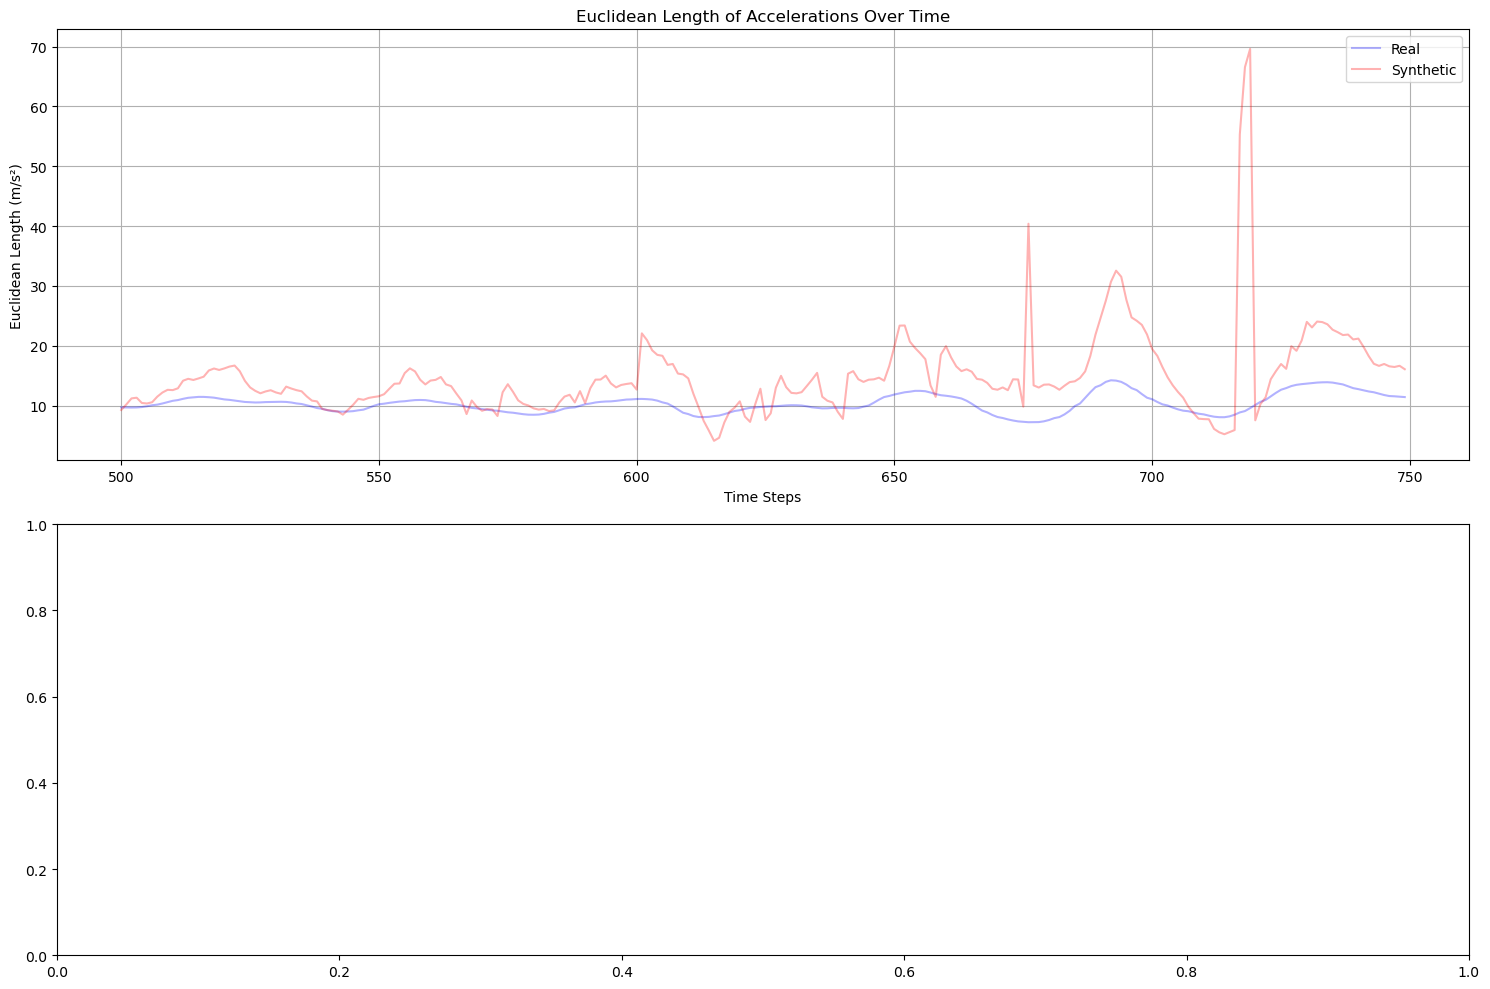

In [12]:
# Calculate Euclidean lengths over time
real_acc_euclidean = np.sqrt(np.sum(subject.trial_imu_map[curr_trial]["acc"][:, 0] ** 2, axis=-1))
syn_acc_euclidean = np.sqrt(np.sum(subject.syn_imu[curr_trial]["acc"][:, 0] ** 2, axis=-1))


# Create stacked plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
t_range = slice(500,750)

# Plot accelerations
time = np.arange(real_acc_euclidean.shape[0])
ax1.plot(time[t_range], real_acc_euclidean[t_range], 'b-', alpha=0.3, label='Real')
ax1.plot(time[t_range], syn_acc_euclidean[t_range], 'r-', alpha=0.3, label='Synthetic')
ax1.set_title('Euclidean Length of Accelerations Over Time')
ax1.set_xlabel('Time Steps')
ax1.set_ylabel('Euclidean Length (m/s²)')
ax1.legend()
ax1.grid(True)

if exists_real_ang_vel:
    real_angvel_euclidean = np.sqrt(np.sum(subject.trial_imu_map[curr_trial]["ang_vel"][:, 0] ** 2, axis=-1))
    syn_angvel_euclidean = np.sqrt(np.sum(subject.syn_imu[curr_trial]["angular_vel"][:, 0] ** 2, axis=-1))
    # Plot angular velocities
    ax2.plot(time[t_range], real_angvel_euclidean[t_range], 'b-', alpha=0.3, label='Real')
    ax2.plot(time[t_range], syn_angvel_euclidean[t_range], 'r-', alpha=0.3, label='Synthetic')
    ax2.set_title('Euclidean Length of Angular Velocities Over Time')
    ax2.set_xlabel('Time Steps')
    ax2.set_ylabel('Euclidean Length (rad/s)')
    ax2.legend()
    ax2.grid(True)

plt.tight_layout()
plt.show()

In [13]:
body_node_names = [subject.skeleton.getBodyNode(name).getName() for name in NIMBLE_BODY_NODES_DIP]
print(body_node_names)

['head', 'thorax', 'pelvis', 'scapula_l', 'scapula_r', 'humerus_l', 'humerus_r', 'ulna_l', 'ulna_r', 'femur_l', 'femur_r', 'tibia_l', 'tibia_r', 'hand_l', 'hand_r', 'calcn_l', 'calcn_r']


In [14]:
# subject.generate_nimble_visualization(curr_trial)